# Visualizing Scaled Data Before Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from qbstyles import mpl_style
mpl_style(dark=True)

In [3]:
df_original = pd.read_csv('../../data/raw/detection_data.csv')
df_original = df_original.iloc[:,:-2]
df_original = df_original.rename(columns={'Output (S)':'output'})
df = df_original.copy()
df

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [4]:
X = df.drop('output', axis=1)
Y = df['output']

In [12]:
st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
X_st = st_scaler.fit_transform(X)
X_st = pd.DataFrame(X_st, columns=X.columns)
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns=X.columns)

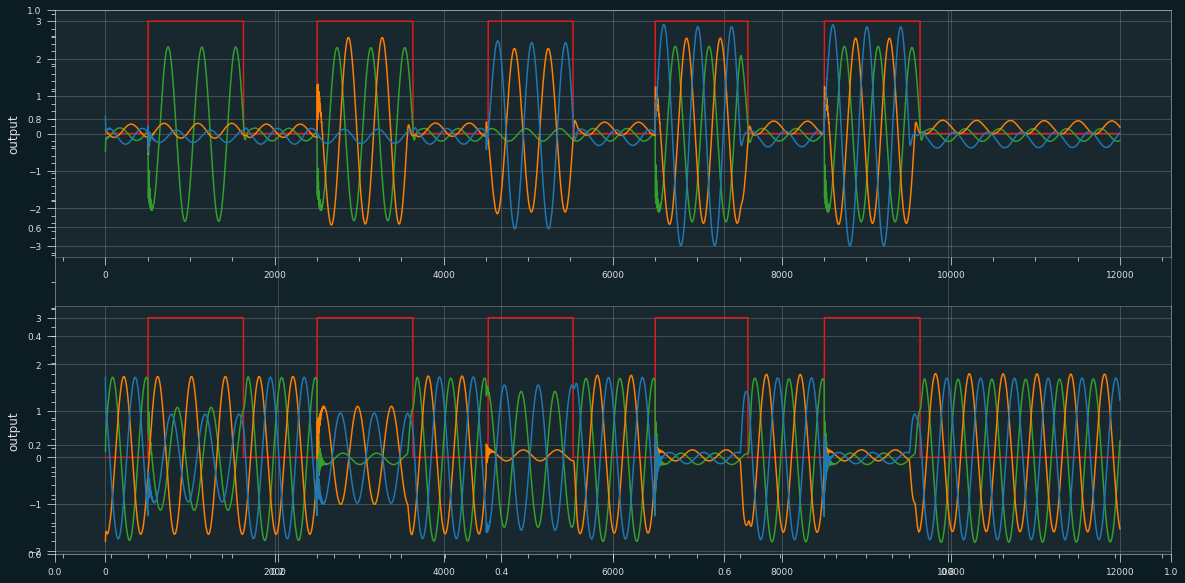

In [37]:
# StandardScaler
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
# Currents
sns.lineplot(data=Y*3, ax=axes[0])
for i in ['Ia', 'Ib', 'Ic']:
    sns.lineplot(data=X_st[i], ax=axes[0])
# Voltages
sns.lineplot(data=Y*3, ax=axes[1])
for i in ['Va', 'Vb', 'Vc']:
    sns.lineplot(data=X_st[i], ax=axes[1])

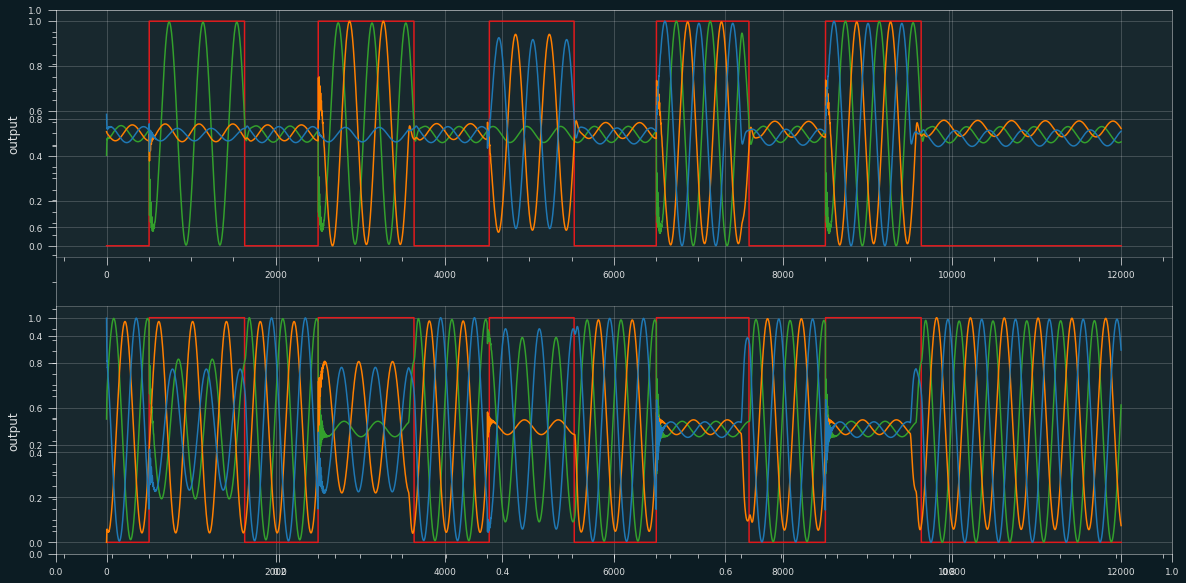

In [36]:
# MinMaxScaler
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
# Currents
sns.lineplot(data=Y, ax=axes[0])
for i in ['Ia', 'Ib', 'Ic']:
    sns.lineplot(data=X_mm[i], ax=axes[0])
# Voltages
sns.lineplot(data=Y, ax=axes[1])
for i in ['Va', 'Vb', 'Vc']:
    sns.lineplot(data=X_mm[i], ax=axes[1])